# Marketing Engagment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../../Datasets/MarketingEngagement/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Coding Response column as 0 or 1
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


# Engagement Rate

In [7]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response']/df.shape[0]*100.0
)

In [8]:
engagement_rate_df.head()

,Response
Engaged,
0,85.679877
1,14.320123


# Sales Channels

In [9]:
engagement_by_sales_channel_df = pd.pivot_table(
    df,values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_sales_channel_df.columns= ['Not Engaged', 'Engaged']

In [10]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


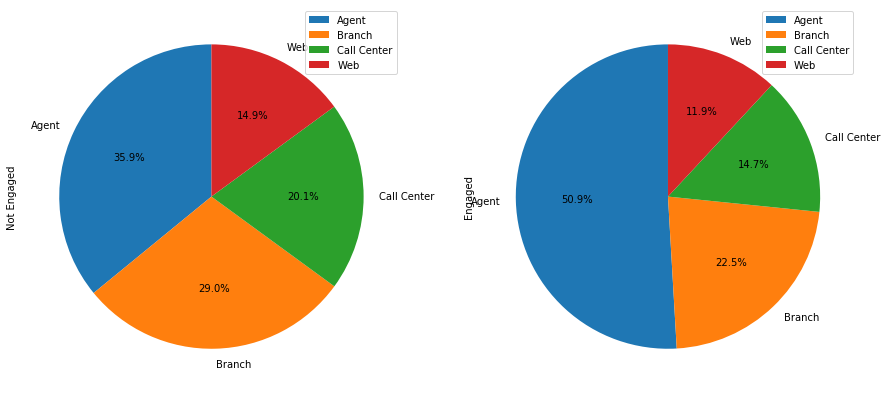

In [11]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%'%x
)

plt.show()

# Total Claim Amount

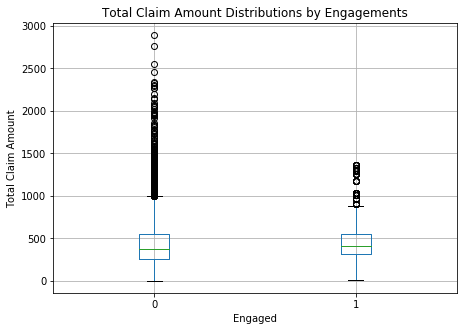

In [12]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")

plt.show()


# Logistic Regression Analysis

In [13]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [14]:
continous_vars = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                 'Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount']
categorical_vars = ['Coverage','Education','EmploymentStatus','Gender']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [16]:
#Encoding Categorical columns
X_cat = pd.get_dummies(df[categorical_vars])

#
y = df['Engaged']

#Continous Variables standarization
X_continous = df[continous_vars]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_continous),columns=continous_vars)

#Concatenating Categorical and continous dataframes 
X = pd.concat([X_cat,X_scaled],axis=1)

X



,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Gender_F,Gender_M,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,1,0,0,1,0,0,0,0,0,1,...,1,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,0,1,0,1,0,0,0,0,0,0,...,1,0,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0,0,1,1,0,0,0,0,0,1,...,1,0,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,1,0,0,1,0,0,0,0,0,0,...,0,1,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,1,0,0,1,0,0,0,0,0,1,...,0,1,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,1,0,0,0,0,0,1,...,0,1,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,0,1,0,0,1,0,0,0,0,1,...,1,0,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0,1,0,1,0,0,0,0,0,0,...,0,1,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,0,1,0,0,1,0,0,0,0,1,...,0,1,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Training Model

In [18]:
logreg = LogisticRegression(random_state=42)

In [19]:
logreg.fit(X_train,y_train)

C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = logreg.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.8633975481611208

In [22]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.93      1942\n           1       0.73      0.14      0.23       342\n\n    accuracy                           0.86      2284\n   macro avg       0.80      0.56      0.58      2284\nweighted avg       0.85      0.86      0.82      2284\n'

In [23]:
confusion_matrix(y_test,y_pred)

array([[1925,   17],
       [ 295,   47]], dtype=int64)

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
treeclass = DecisionTreeClassifier(random_state=42)

In [26]:
treeclass.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [27]:
y_pred = treeclass.predict(X_test)

In [40]:
# Getting important predictors
features = pd.DataFrame(treeclass.feature_importances_.reshape(1,23), columns=X.columns)

In [41]:
features

,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Gender_F,Gender_M,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.008497,0.011462,0.003963,0.002616,0.010982,0.020464,0.009071,0.0129,0.0,0.00241,...,0.005593,0.005199,0.166216,0.130524,0.111634,0.088258,0.137694,0.017993,0.034652,0.127921


In [47]:
features.sort_values(by=0,axis=1,ascending=False)

,Customer Lifetime Value,Months Since Policy Inception,Income,Total Claim Amount,Monthly Premium Auto,EmploymentStatus_Retired,Months Since Last Claim,Number of Policies,Education_Doctor,Number of Open Complaints,...,Education_High School or Below,Coverage_Basic,Gender_F,Gender_M,Coverage_Premium,Education_Bachelor,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,EmploymentStatus_Disabled
0,0.166216,0.137694,0.130524,0.127921,0.111634,0.091021,0.088258,0.034652,0.020464,0.017993,...,0.009071,0.008497,0.005593,0.005199,0.003963,0.002616,0.00241,0.00093,0.0,0.0


In [48]:
accuracy_score(y_test,y_pred)

0.9649737302977233

In [49]:
confusion_matrix(y_test,y_pred)

array([[1862,   80],
       [   0,  342]], dtype=int64)